# PCA, t-SNE, and LLE: Dimensionality Reduction on MNIST

This project applies machine learning techniques to the MNIST dataset, a widely used dataset of handwritten digit images. The aim is to classify digits using a **Random Forest algorithm** and explore the impact of dimensionality reduction techniques, such as **PCA**, **t-SNE**, and **LLE**, on classification performance. By comparing results on the original and reduced datasets, this project highlights the effectiveness of these techniques in reducing complexity while maintaining model accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
mnist = pd.read_csv('../data/mnist_dataset_raw.csv')

In [3]:
mnist.keys()

Index(['Unnamed: 0', 'label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7',
       '1x8',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=786)

In [4]:
mnist.head()

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist.tail()

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
69995,69995,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,69996,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,69997,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,69998,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69999,69999,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 70,000 images, and each image has 784 features. This is because each image is 28x28 pixels, and each feature represents one pixel's intensity, from 0 (white) to 255 (black).

In [6]:
features = [col for col in mnist.columns if col not in ['Unnamed: 0', 'label']]
X = mnist[features]
y = mnist['label']

In [7]:
display(X)
display(y)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0        2
1        5
2        8
3        0
4        4
        ..
69995    1
69996    7
69997    4
69998    8
69999    7
Name: label, Length: 70000, dtype: int64

The MNIST dataset is already split into a training set (the first 60,000 images) and a test set (the last 10,000 images):

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (60000, 784)
X_test.shape: (10000, 784)
y_train.shape: (60000,)
y_test.shape: (10000,)


In [10]:
display(X_train)
display(y_train)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0        2
1        5
2        8
3        0
4        4
        ..
59995    1
59996    7
59997    7
59998    4
59999    5
Name: label, Length: 60000, dtype: int64

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_1 = RandomForestClassifier(random_state=42)

In [12]:
%%time
rf_clf_1.fit(X_train, y_train)

CPU times: user 26.5 s, sys: 203 ms, total: 26.7 s
Wall time: 26.7 s


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import accuracy_score

y_pred = rf_clf_1.predict(X_test)
accuracy_score(y_test, y_pred)

0.9702

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [15]:
rf_clf_2 = RandomForestClassifier(random_state=42)

In [16]:
%%time
rf_clf_2.fit(X_train_reduced, y_train)

CPU times: user 1min 13s, sys: 437 ms, total: 1min 13s
Wall time: 1min 13s


RandomForestClassifier(random_state=42)

There is a significant slowdown in training now. Dimensionality reduction does not always lead to faster training time; it depends on the dataset, the model, and the training algorithm.

In [17]:
X_test_reduced = pca.transform(X_test)
y_pred = rf_clf_2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9508

As a result of reducing dimensionality, performance does suffer because we lose some valuable signals. However, the performance loss is quite significant in this case. Therefore, PCA did not help; it slowed down training and decreased performance.

In [18]:
mnist_subset = mnist[:60000].sample(frac=0.25, random_state=42)

In [19]:
X_subset = mnist_subset[features]
y_subset = mnist_subset['label']

In [20]:
display(X_subset)
display(y_subset)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
12628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


12628    2
37730    0
39991    2
8525     1
8279     6
        ..
15381    7
928      4
27497    8
50554    8
3673     2
Name: label, Length: 15000, dtype: int64

In [21]:
y_subset.value_counts(normalize=True)

1    0.112067
6    0.105400
3    0.105200
7    0.105200
8    0.100067
0    0.097800
2    0.097000
9    0.094467
4    0.092400
5    0.090400
Name: label, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition:
def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap('jet')
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis('off')
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={'weight': 'bold', 'size': 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap='binary'), image_coord)
                ax.add_artist(imagebox)

In [23]:
from sklearn.manifold import TSNE

In [24]:
%%time
X_tse_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_subset)

CPU times: user 4min 59s, sys: 29.4 s, total: 5min 29s
Wall time: 45.3 s


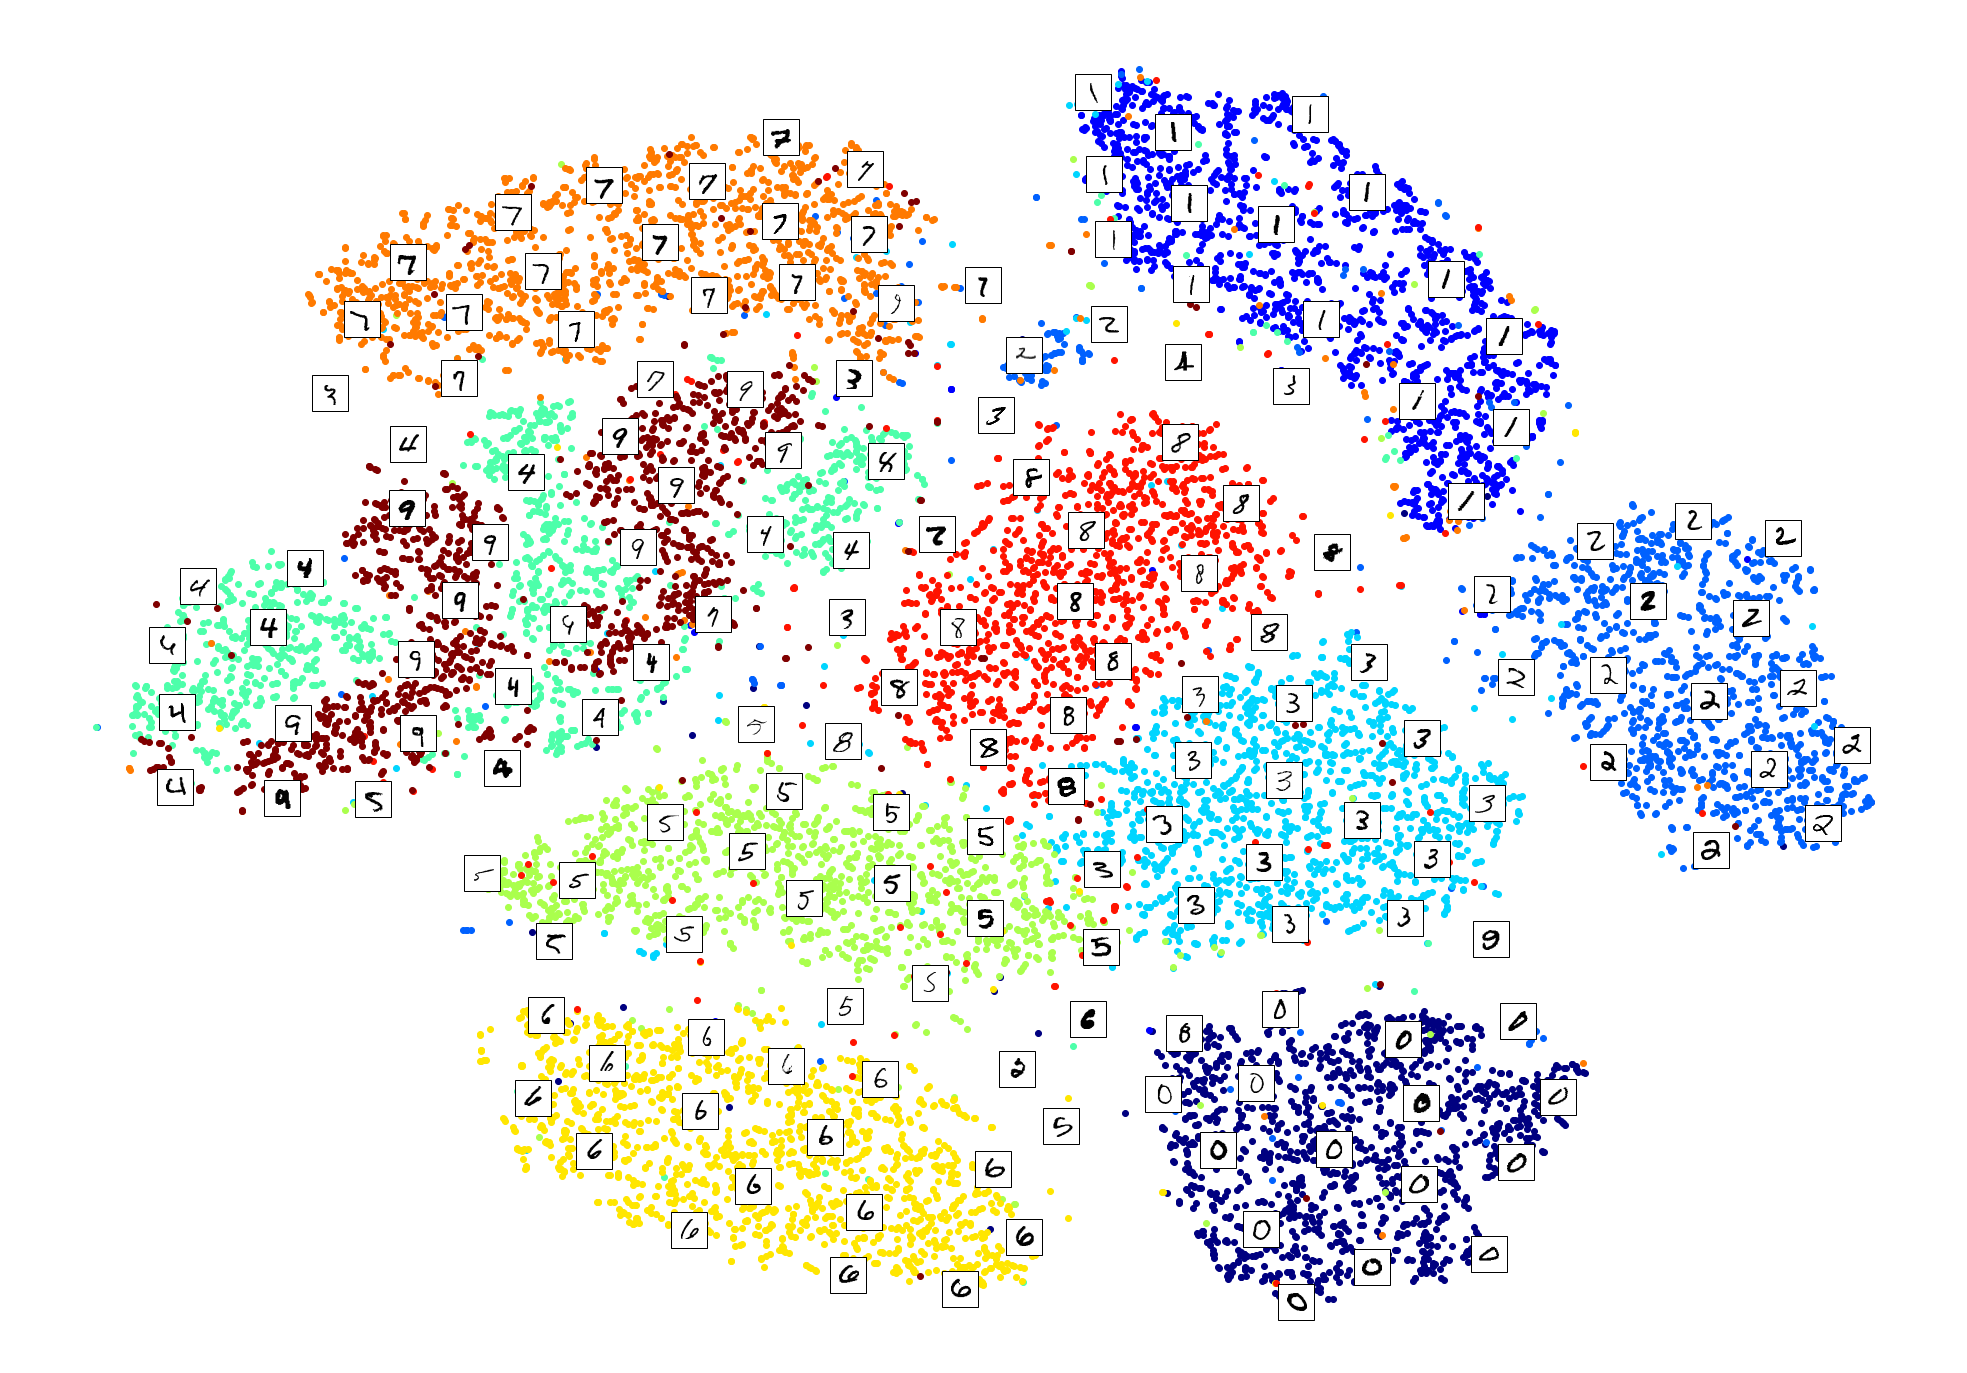

In [25]:
plot_digits(X_tse_reduced, y_subset, images=np.array(X_subset), figsize=(35, 25))

According to the plot, some numbers are relatively easy to distinguish, while others are more challenging. Most 0s, 1s, 2s, 6s, and 7s, for example, are quite distinct, whereas some 3s, 4s, 5s, 8s, and 9s are not.

Let's compare the visualizations of PCA, LLE, MDS, and t-SNE (see above):

In [26]:
%%time
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X_subset)

CPU times: user 1.04 s, sys: 165 ms, total: 1.21 s
Wall time: 194 ms


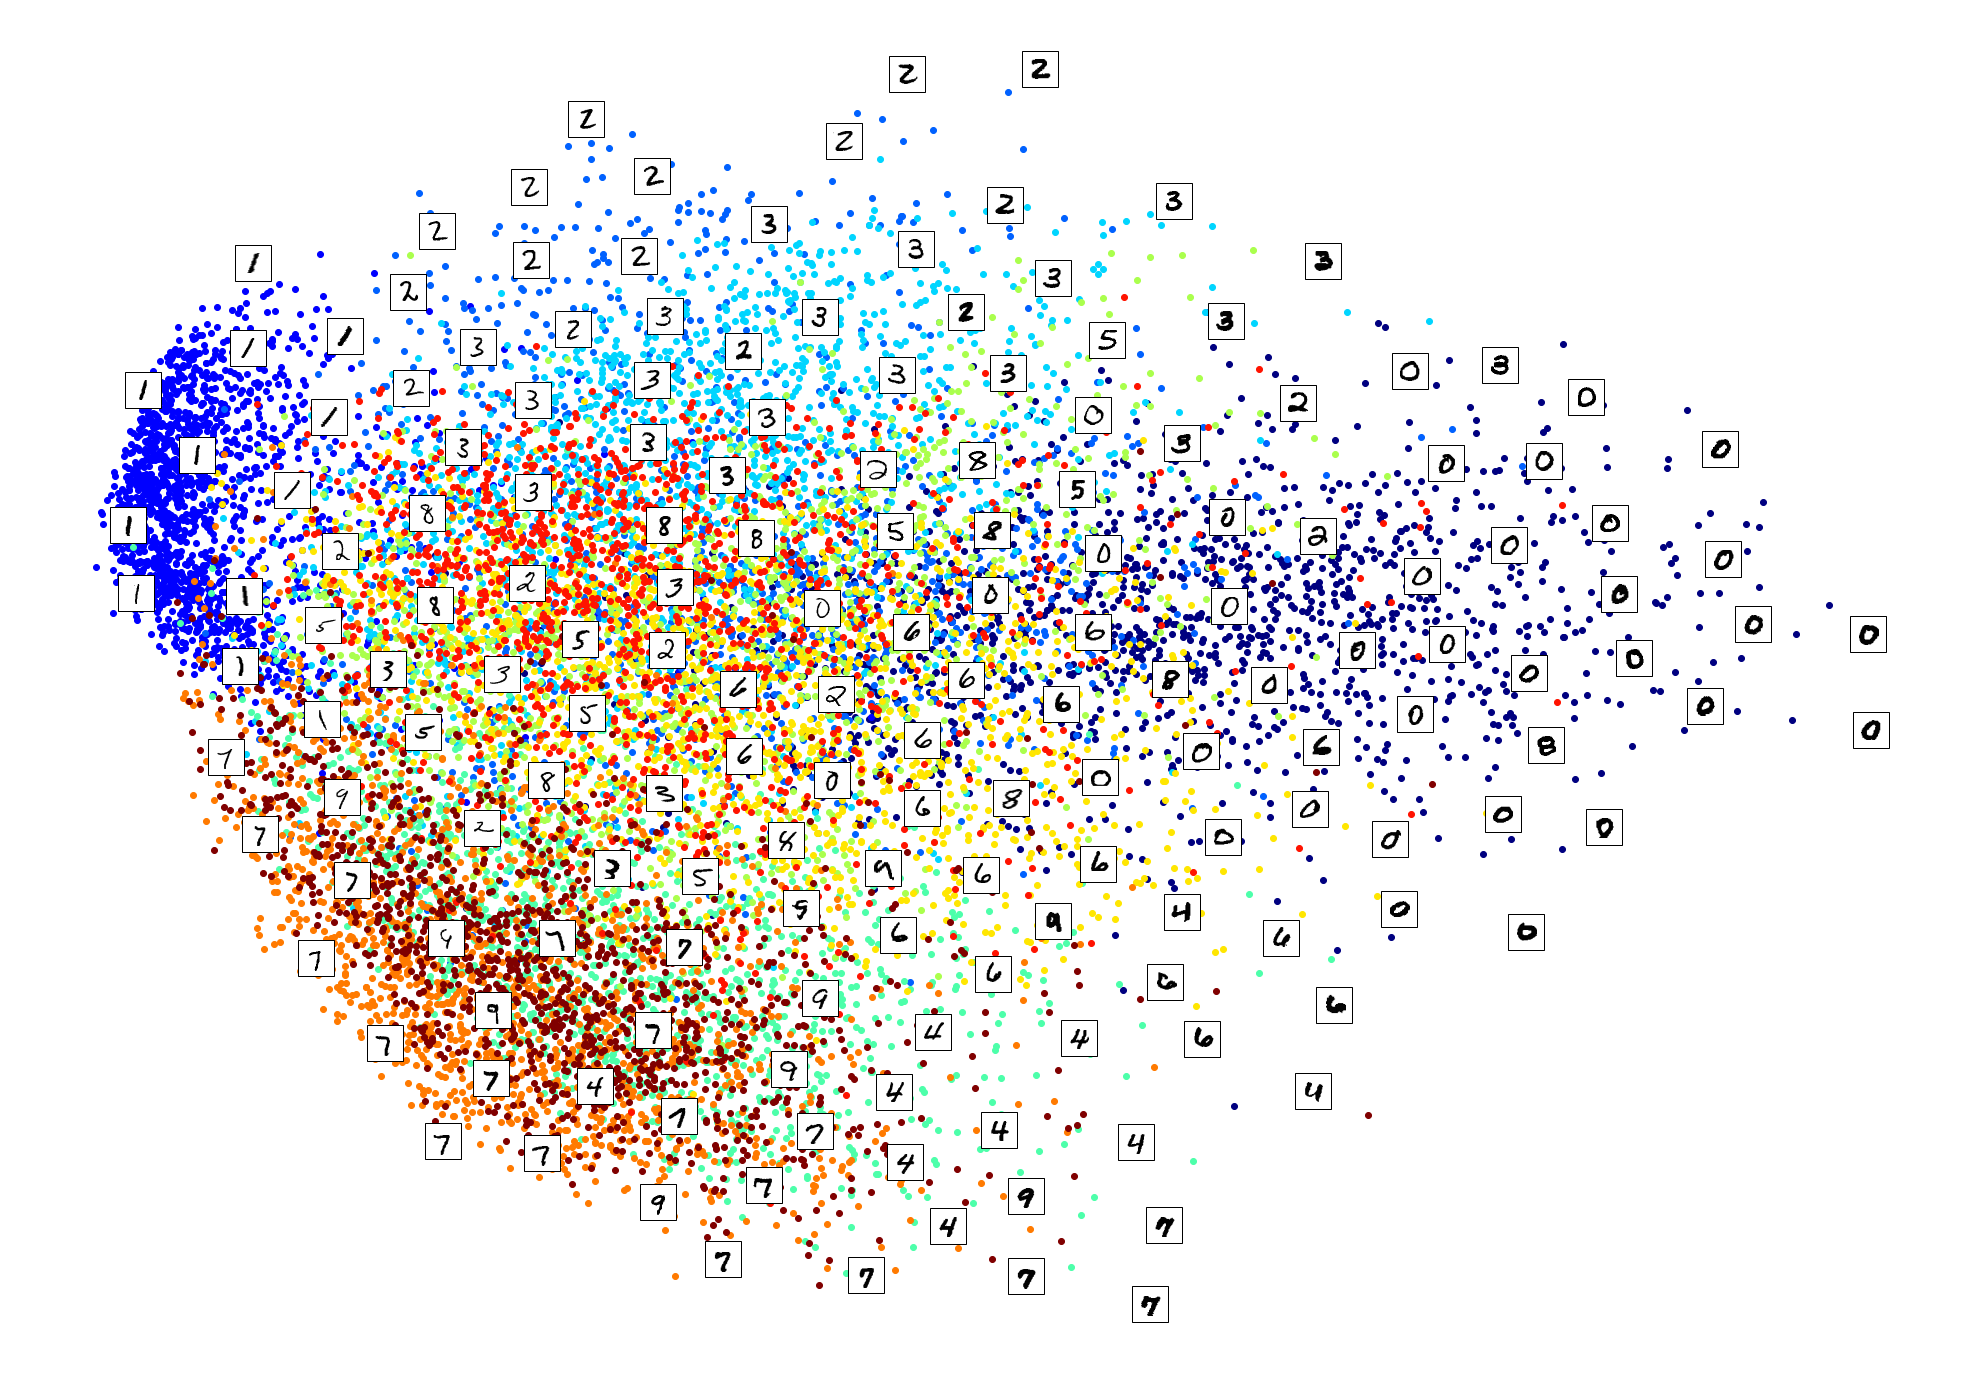

In [27]:
plot_digits(X_pca_reduced, y_subset, images=np.array(X_subset), figsize=(35, 25))

Although PCA is fast and some clusters are visible, there is too much overlap.

In [28]:
from sklearn.manifold import LocallyLinearEmbedding

In [29]:
%%time
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X_subset)

CPU times: user 3min 28s, sys: 27.4 s, total: 3min 55s
Wall time: 33.9 s


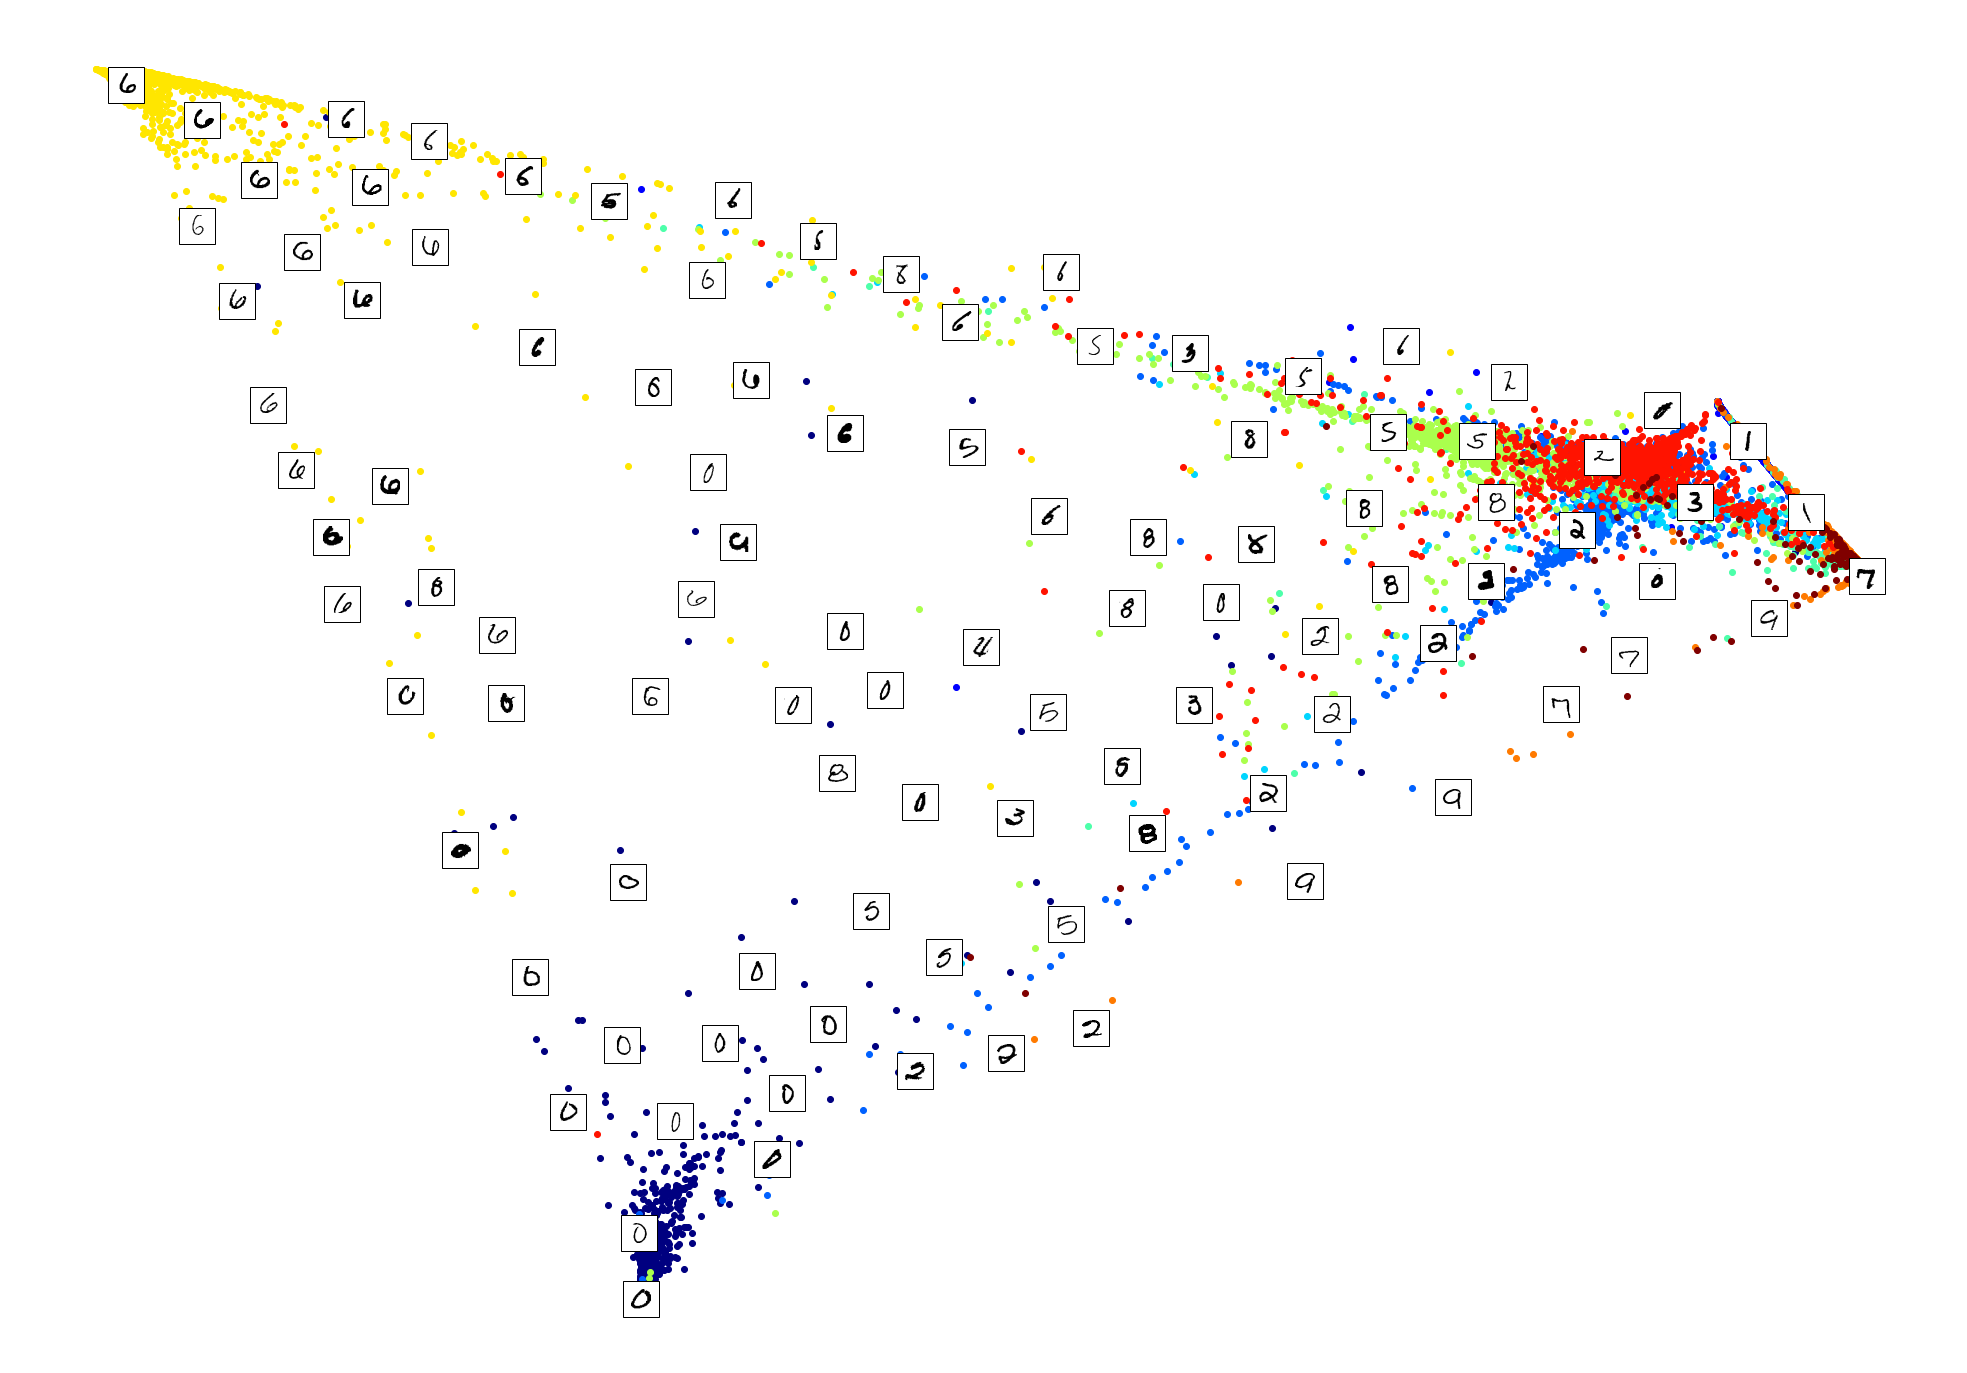

In [30]:
plot_digits(X_lle_reduced, y_subset, images=np.array(X_subset), figsize=(35, 25))

It took some time, and the results aren't encouraging (all clusters overlap too much).

In [31]:
from sklearn.manifold import MDS

In [32]:
%%time
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X_subset)

CPU times: user 1h 20min 34s, sys: 54min 38s, total: 2h 15min 13s
Wall time: 1h 26min 16s


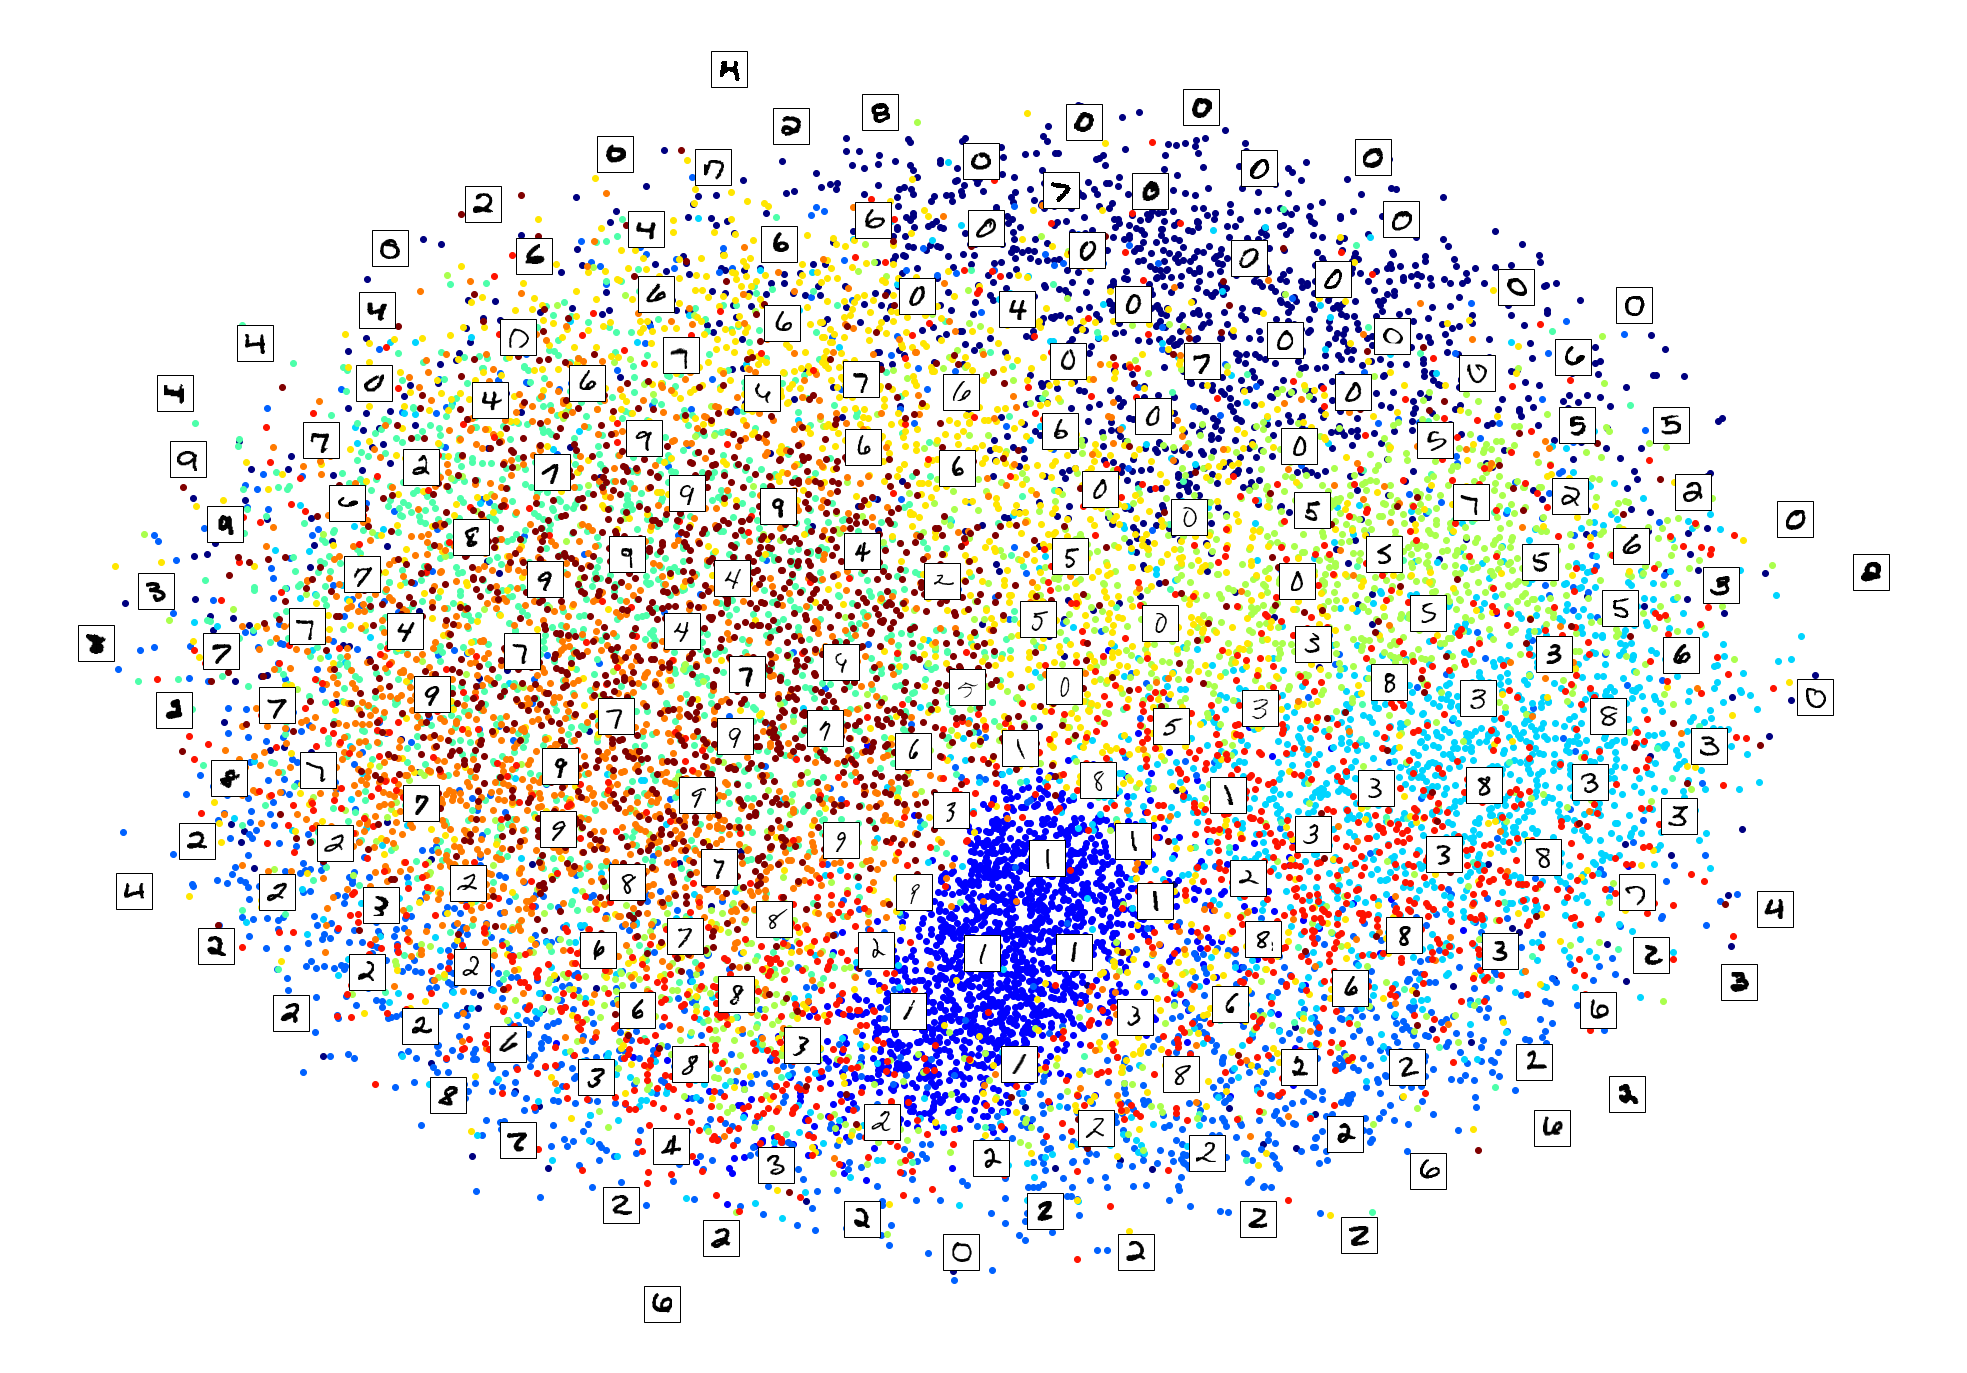

In [33]:
plot_digits(X_mds_reduced, y_subset, images=np.array(X_subset), figsize=(35, 25))

The process took a long time, and the results could have been better (all clusters overlapped too much).

Although t-SNE is slower than PCA and LLE, it is much faster than MDS; moreover, its result looks great.